In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from scipy.stats import skew, stats
from math import sqrt
from scipy import stats
from numpy import mean, var


In [2]:
Data=pd.read_csv(r'D:\New_C\insurance.csv')

In [3]:
display(Data)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
Data['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [5]:
#Shape of the data
Data.shape

(1338, 7)

In [30]:
# data type
Data.dtypes
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# checking the outliers
Data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# 5 point summary of numerical attributes
Data.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [29]:
## Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.
Data2=Data.loc[:,['age','bmi','charges']]
Data2.head()

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520


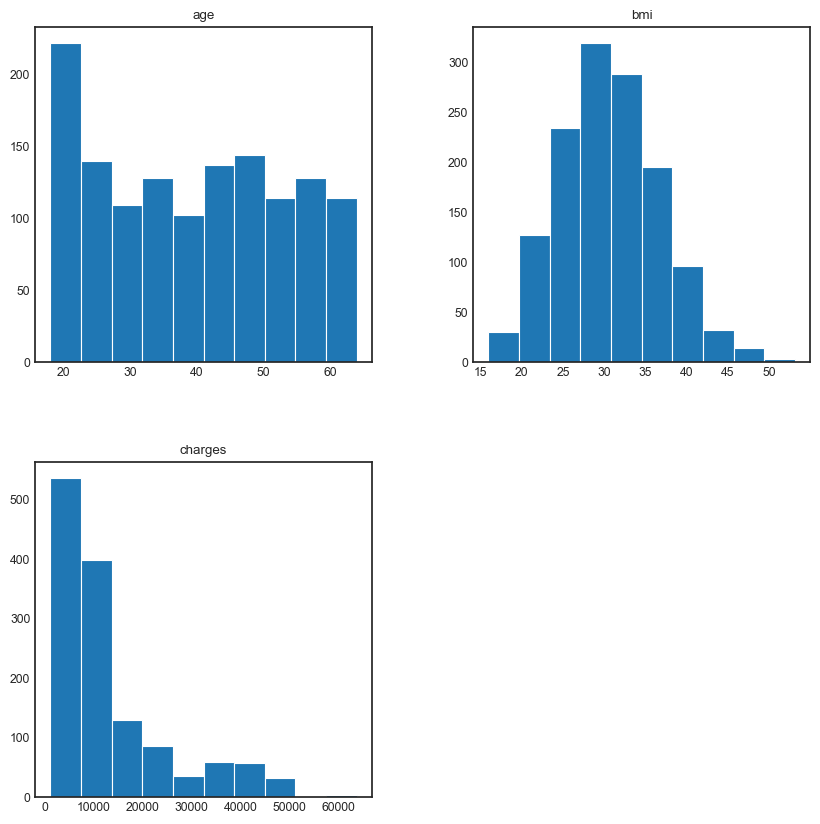

In [36]:
# sns.set_style('white')
# sns.set_context("paper", font_scale = 1)
# sns.displot(data=Data2, kind="hist", bins = 10, aspect = 1.5)
plt.style.use('seaborn-white')
Data2.hist(bins=10, figsize=(10,10), grid= False)
plt.show()

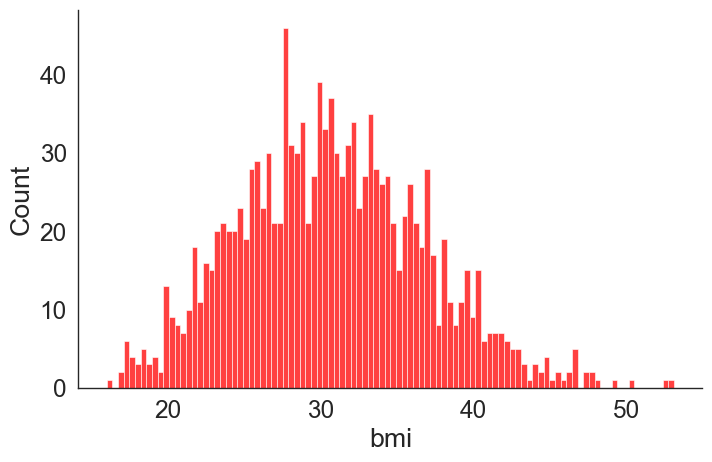

In [38]:

sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=Data2, x="bmi", kind="hist", bins = 100, aspect = 1.5,color='red')
# sns.distplot(Data2['bmi'],color='red')
# plt.show()

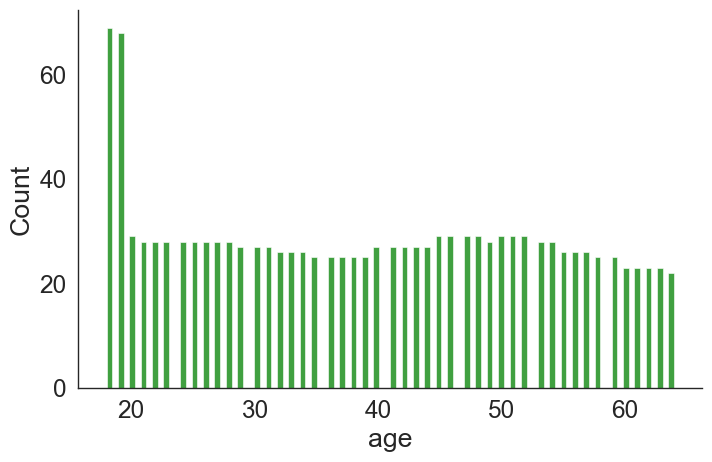

In [39]:
# sns.distplot(Data2['age'],color='green')
# plt.show()

sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=Data2, x="age", kind="hist", bins = 100, aspect = 1.5,color='green')

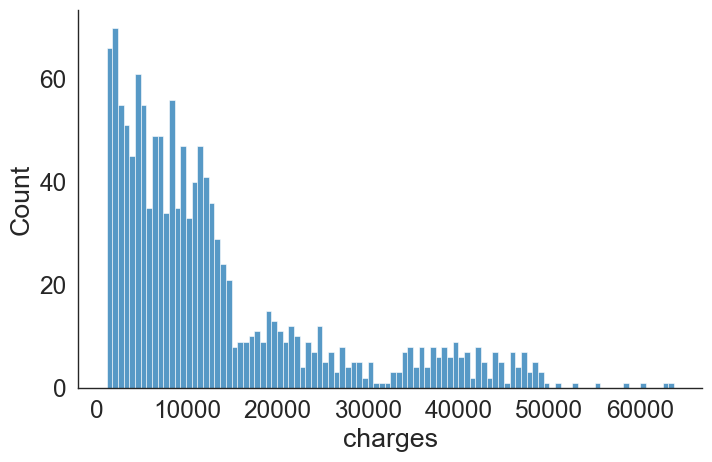

In [37]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=Data2, x="charges", kind="hist", bins = 100, aspect = 1.5)


In [14]:
##Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns
Data2.isna().sum()


bmi        0
age        0
charges    0
dtype: int64

In [15]:
Data3=Data.loc[:,['age','sex','bmi','children','smoker','region','charges']]
Data3.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


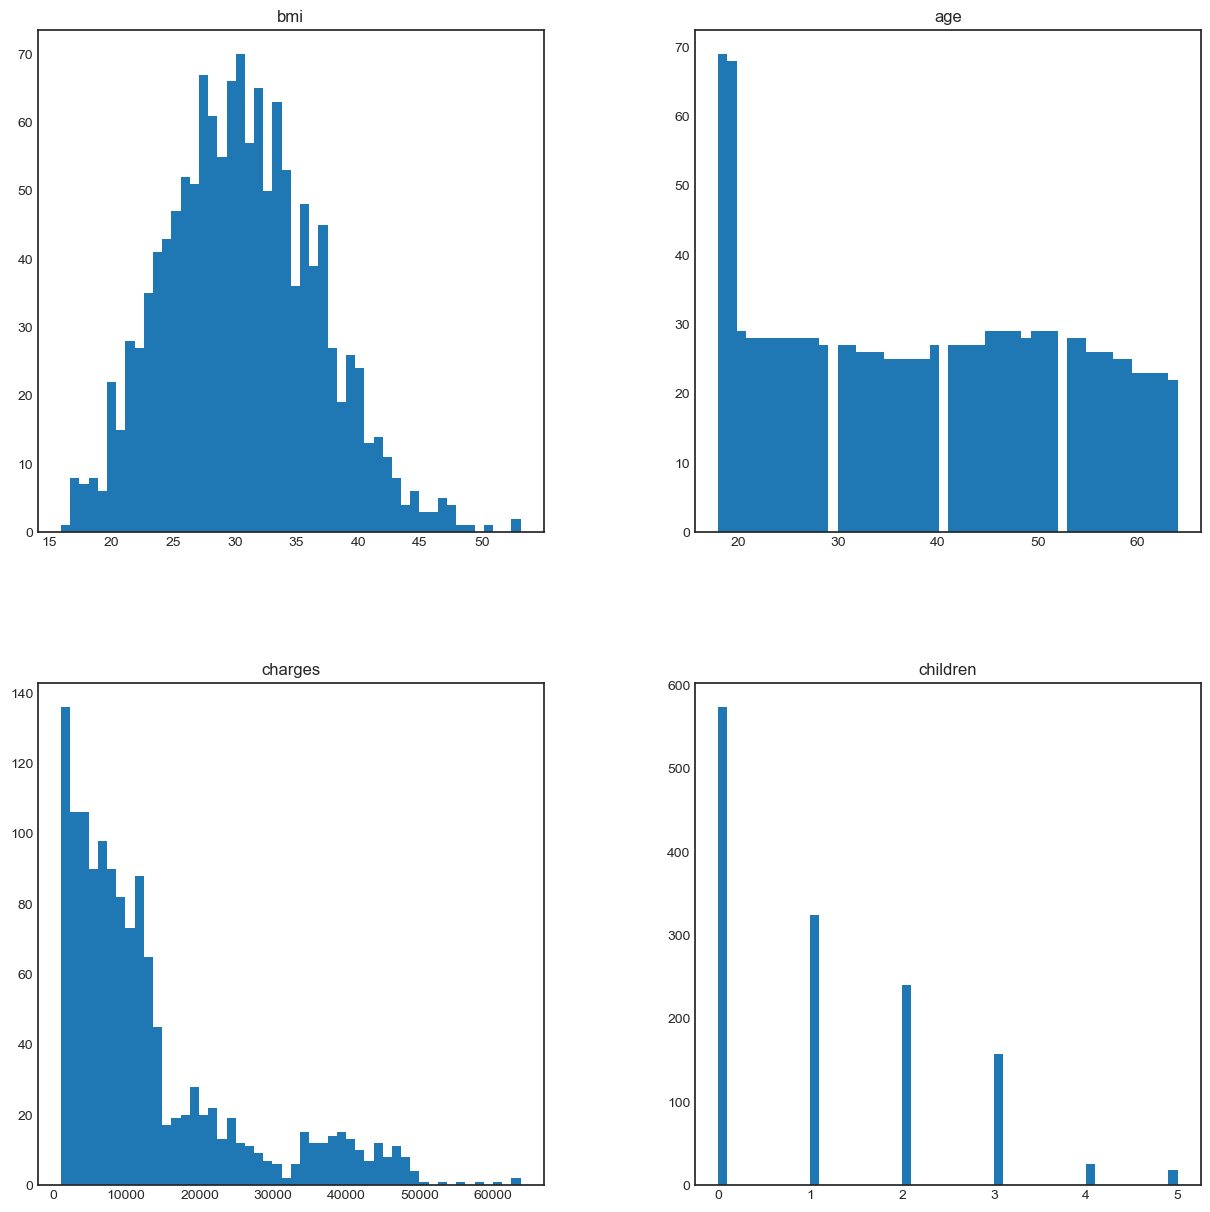

In [16]:
#Distribution of categorical columns (include children)
Data2=Data.loc[:,['bmi', 'age', 'charges','children']]
Data2.head()
plt.style.use('seaborn-white')
Data2.hist(bins=50, figsize=(15,15),grid=False, )
plt.show()


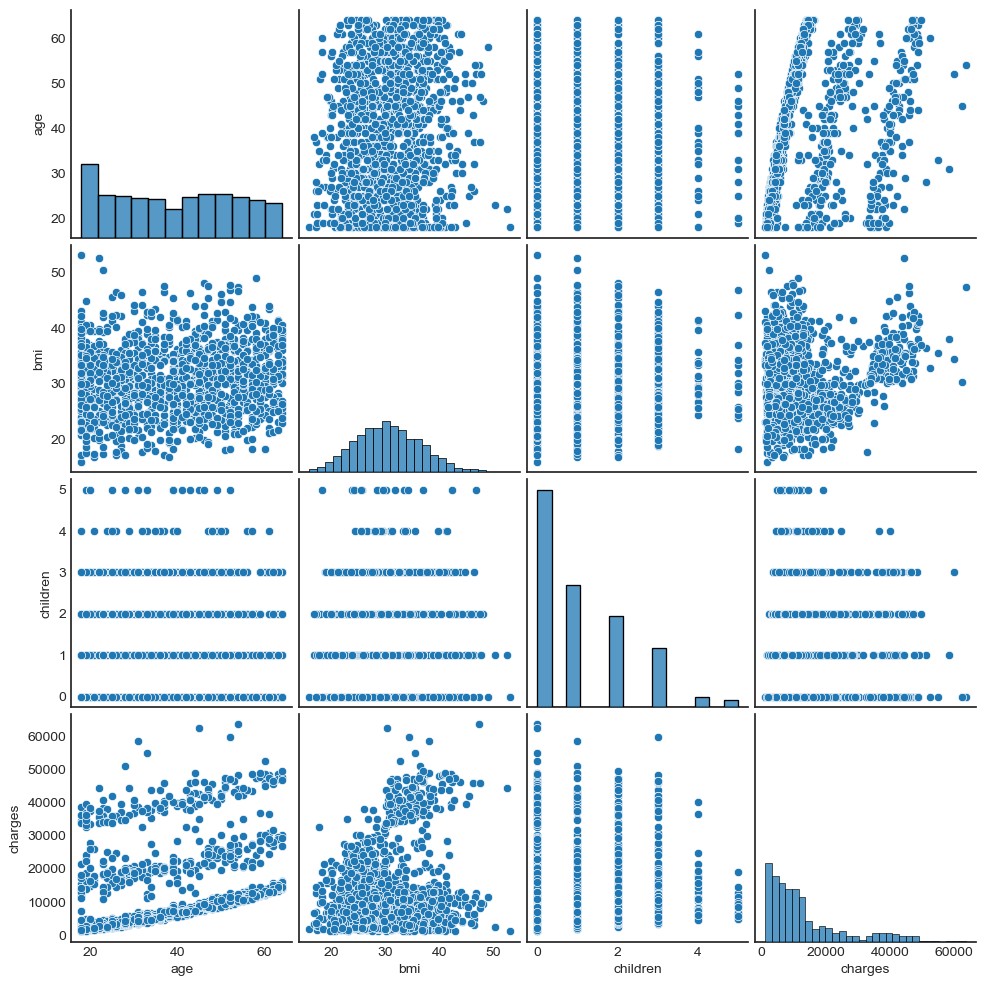

In [17]:
#Pair plot that includes all the columns of the data frame (4 marks)
sns.pairplot(Data)
plt.show()

In [18]:
#Do charges of people who smoke differ significantly from the people who don't?
Data4=Data.loc[:,['age','smoker','charges']]
Data4

,age,smoker,charges
0,19,yes,16884.92400
1,18,no,1725.55230
2,28,no,4449.46200
3,33,no,21984.47061
4,32,no,3866.85520
...,...,...,...
1333,50,no,10600.54830
1334,18,no,2205.98080
1335,18,no,1629.83350
1336,21,no,2007.94500


In [19]:
Data4.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [20]:

# T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same "   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

x = np.array(Data[Data.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers as an array
y = np.array(Data[Data.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842179102e-283) < 0.05


C:\Users\Yordanos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


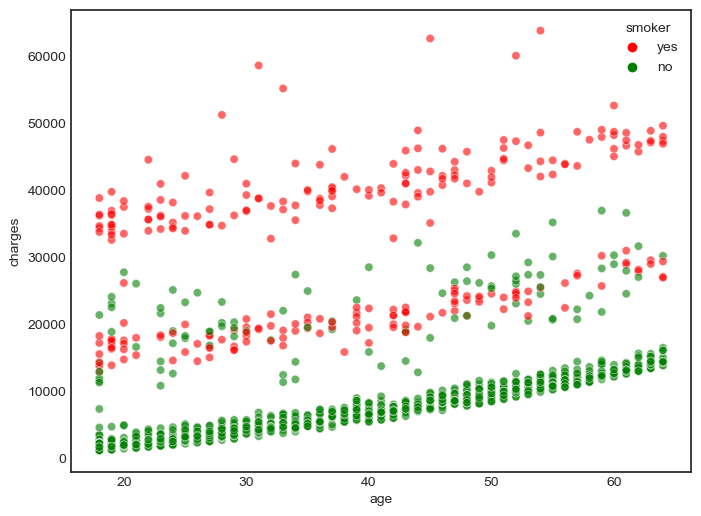

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(Data4.age, Data4.charges,hue=Data4.smoker,palette= ['red','green'] ,alpha=0.6)
plt.show()

In [22]:
Data5=Data.loc[:,['bmi','sex']]
Data5

Data5.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\Yordanos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


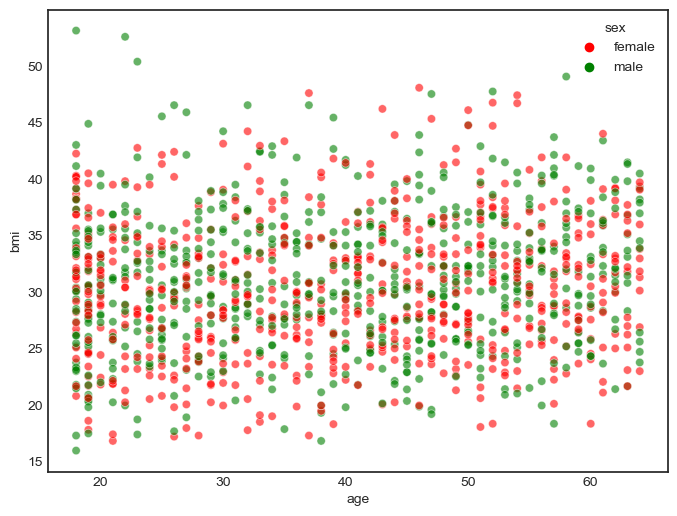

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(Data.age, Data.bmi,hue=Data.sex,palette= ['red','green'] ,alpha=0.6)
plt.show()

In [24]:
Ho = "bmi of male and female are same "   # Stating the Null Hypothesis
Ha = "of male and female are same are not the same"   # Stating the Alternate Hypothesis

x_1= np.array(Data[Data.sex == 'male'].bmi)  # bmi corresponding to male as an array
y_1 = np.array(Data[Data.sex == 'female'].bmi) #bmi corresponding to female as an array

t, p_value  = stats.ttest_ind(x_1,y_1, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

bmi of male and female are same  as the p_value (0.08997637178984932) > 0.05


In [25]:
###Is the proportion of smokers significantly different in different genders?

Data6=Data.loc[:,['sex','smoker']]


C:\Users\Yordanos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


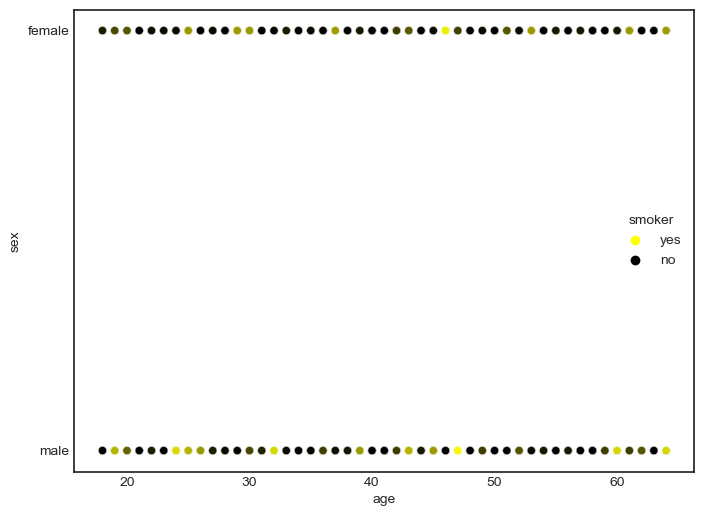

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(Data.age, Data.sex,hue=Data.smoker,palette= ['yellow','black'] ,alpha=0.6)
plt.show()

In [27]:
# Chi_square test to check if smoking habits are different for different genders

Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(Data['sex'],Data['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


In [44]:
 #Test to see if the distributions of bmi values for females having different number of children, are significantly different

Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female_Data = copy.deepcopy(Data[Data['sex'] == 'female'])

zero = female_Data[female_Data.children == 0]['bmi']
one = female_Data[female_Data.children == 1]['bmi']
two = female_Data[female_Data.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
    
    
    


No. of children has no effect on bmi as the p_value (0.716) > 0.05
